**import useful libraries**

In [1]:
import pandas as pd #for loading dataframe
import numpy as np #for numeric computations
import seaborn as sb #high level visualization
import matplotlib.pyplot as plt # for visualization
from pylab import rcParams #setting default size of my visualizations
from collections import Counter # for counting levels of variables 
from IPython.display import display_html #to display in html formats
pd.options.display.max_rows = None #set number of rows to display
pd.options.display.max_columns = None #set number of columns to display
sb.set_palette('Set1') #default color palette to use
rcParams['figure.figsize'] = 8,8 #default visualization size
%matplotlib inline #print visualizations in notebook

**load data**

In [10]:
trainwine = pd.read_csv('/home/francis/AMMI/BootCamp Competition/train.csv')
print('Train data successfully loaded...!!!')
testwine = pd.read_csv('/home/francis/AMMI/BootCamp Competition/test.csv')
print('Test data successfully loaded...!!!')

Train data successfully loaded...!!!
Test data successfully loaded...!!!


In [11]:
# !ls '/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/'

In [ ]:
trainwine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/train.csv')
print('Train data is successfully loaded...!!!')
print('Train data contains {} observations and {} feature columns.'.format(trainwine.shape[0],trainwine.shape[1]))
print('+*+'*35)
testwine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/test.csv')
TW = testwine.copy()
print('Test data is successfully loaded...!!!')
print('Test data contains {} observations and {} feature columns.'.format(testwine.shape[0],testwine.shape[1]))

**display first 5 rows  of train data**

In [13]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [14]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4


### Data Cleaning

**set id as data index**

In [0]:
trainwine.set_index('id',inplace=True)
testwine.set_index('id',inplace=True)

In [273]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
32027,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos
71079,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier
32440,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac
124405,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs
33649,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline


In [274]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,,
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle


In [275]:
print(trainwine.info())
print('+-*+'*10)
print('+-*+'*10)
print(testwine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175000 entries, 32027 to 91621
Data columns (total 13 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
dtypes: float64(2), object(11)
memory usage: 18.7+ MB
None
+-*++-*++-*++-*++-*++-*++-*++-*++-*++-*+
+-*++-*++-*++-*++-*++-*++-*++-*++-*++-*+
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83210 entries, 0 to 83209
Data columns (total 14 columns):
index         

In [0]:
# let's convert points data type from float to integer
trainwine['points'] = trainwine['points'].astype(int)
testwine['points'] = testwine['points'].astype(int)

In [0]:
# Let make sure that all the categorical features are all lower cases to avoid duplicates
for i in trainwine.columns:
  if trainwine[i].dtype == 'O':
    trainwine[i] = trainwine[i].str.lower()
    
for i in testwine.columns:
  if testwine[i].dtype == 'O':
    testwine[i] = testwine[i].str.lower()    

**remove columns which we will not need, like title,taster_twitter_handle and taster_name**

In [0]:
p = ['title','taster_twitter_handle','taster_name']
q = ['index','title','taster_twitter_handle','taster_name','price']
trainwine.drop(columns=p, axis =1,inplace=True)
testwine.drop(columns=q, axis =1,inplace=True)

In [279]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
id,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,NaN,NaN,portuguese red,j. portugal ramos
71079,france,"a solid, chunky wine, with a structure that is...",NaN,88,28.0,bordeaux,lalande de pomerol,NaN,bordeaux-style red blend,château tour grand colombier
32440,france,"this is powerful and concentrated, with the hi...",NaN,94,130.0,bordeaux,saint-émilion,NaN,bordeaux-style red blend,château figeac
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,central coast,petite sirah,jaffurs
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,columbia valley,rosé,syncline


In [280]:
testwine.head()

,country,description,designation,points,province,region_1,region_2,variety,winery
id,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,napa,cabernet sauvignon,salvestrin
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,NaN,syrah,les vins de vienne
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,central coast,cabernet franc,brave & maiden
3,us,white flowers and wild anise give this a crisp...,NaN,89,california,sonoma coast,sonoma,chardonnay,les voleurs
4,us,pinot gris has been making inroads in washingt...,NaN,88,washington,columbia valley (wa),columbia valley,pinot gris,chateau ste. michelle


**Let's create bins for our points**

In [281]:
trainwine['points'].describe()

count    175000.000000
mean         87.581606
std           3.195285
min          79.000000
25%          85.000000
50%          87.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [282]:
Counter(trainwine['points'])

Counter({79: 423,
         80: 1231,
         81: 2676,
         82: 4911,
         83: 8353,
         84: 12338,
         85: 15840,
         86: 20665,
         87: 22729,
         88: 18585,
         89: 17616,
         90: 16374,
         91: 12508,
         92: 9466,
         93: 5866,
         94: 3183,
         95: 1332,
         96: 521,
         97: 243,
         98: 86,
         99: 37,
         100: 17})

In [0]:
# #Transform method taking points as param
# def transform_points(points):
#     if points < 84:
#         return 1
#     elif points >= 84 and points < 89:
#         return 2 
#     elif points >= 89 and points < 95:
#         return 3 
#     elif points >= 95 and points < 99:
#         return 4 
#     else:
#         return 5

In [0]:
# #Applying transform method and assigning result to new column "points_cat"
# trainwine = trainwine.assign(points_cat = trainwine['points'].apply(transform_points))
# testwine = testwine.assign(points_cat = testwine['points'].apply(transform_points))

**check for missing values in data**

In [285]:
print('The missing values in the training data are as shown below:')
print('+*+'*20)
trainwine.isnull().sum().sort_values(ascending=False)

The missing values in the training data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


region_2       99606
designation    52266
region_1       28534
province          47
country           47
variety            1
points_cat         0
winery             0
price              0
points             0
description        0
dtype: int64

In [286]:
print('The missing values in the test data are as shown below:')
print('+*+'*20)
testwine.isnull().sum().sort_values(ascending=False)

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


region_2       47608
designation    24824
region_1       13883
province          17
country           17
points_cat         0
winery             0
variety            0
points             0
description        0
dtype: int64

Since we have information about the province,region_1 and designation and country then we will drop the region_2 since it contains a lot of missing values.

In [0]:
trainwine.drop('region_2',axis=1,inplace=True)
testwine.drop('region_2',axis=1,inplace=True)

In [288]:
for i in trainwine.columns:
  if trainwine[i].isnull().sum() >= 1:
    trainwine[i].fillna('missing',inplace = True)

print('The missing values in the test data are as shown below:')
print('+*+'*20)
trainwine.isnull().sum().sort_values(ascending=False)    

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


points_cat     0
winery         0
variety        0
region_1       0
province       0
price          0
points         0
designation    0
description    0
country        0
dtype: int64

In [289]:
for i in testwine.columns:
  if testwine[i].isnull().sum() >= 1:
    testwine[i].fillna('missing',inplace = True)

print('The missing values in the test data are as shown below:')
print('+*+'*20)
testwine.isnull().sum().sort_values(ascending=False)    

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


points_cat     0
winery         0
variety        0
region_1       0
province       0
points         0
designation    0
description    0
country        0
dtype: int64

We will fill missing values in country, province and region_1 with missing since the other columns contain information.

In [290]:
print(trainwine.shape)
print(testwine.shape)

(175000, 10)
(83210, 9)


**We will first check for duplicates and drop them**

We consider the description and points assigned by the reviewers to be extremely important for our prediction, hence, we will remove all the duplicate data points in these columns and further drop all the missing values in these features.

In [291]:
# it is obvious from the dataframe below that our data contains duplicates in the description given by reviewers
trainwine[trainwine.duplicated('description', keep = False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,variety,winery,points_cat
id,,,,,,,,,,
94355,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,85,24.0,niederösterreich,missing,grüner veltliner,winzer krems,2
96052,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,84,24.0,niederösterreich,missing,grüner veltliner,winzer krems,2
147725,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa,2
62345,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa,2
68876,us,). savory on the nose with scents of pressed a...,reserve,85,16.0,new york,finger lakes,riesling,fulkerson,2


In [0]:
# # now we will drop the duplicated descriptions
# trainwine = trainwine.drop_duplicates('description')
# # let's check for the size of the data after removong duplicates
# print(trainwine.shape)

### Exploratory Data Analysis

We will explore the overall distribution of the data and attempt to answer some basic questions regarding the data which include:
> * the relationship between the price and points of wine.
> * the country with the most expensive and cheapest wine.
> * the country with the best and worst wine by points on average.
> * the country with the most expensive and cheapest wine on average.
> * the price by variety to know if some varieties are expensive.
> * the price by variety to know if some varieties are of great quality.

**Relationship between the price and points of wine.**

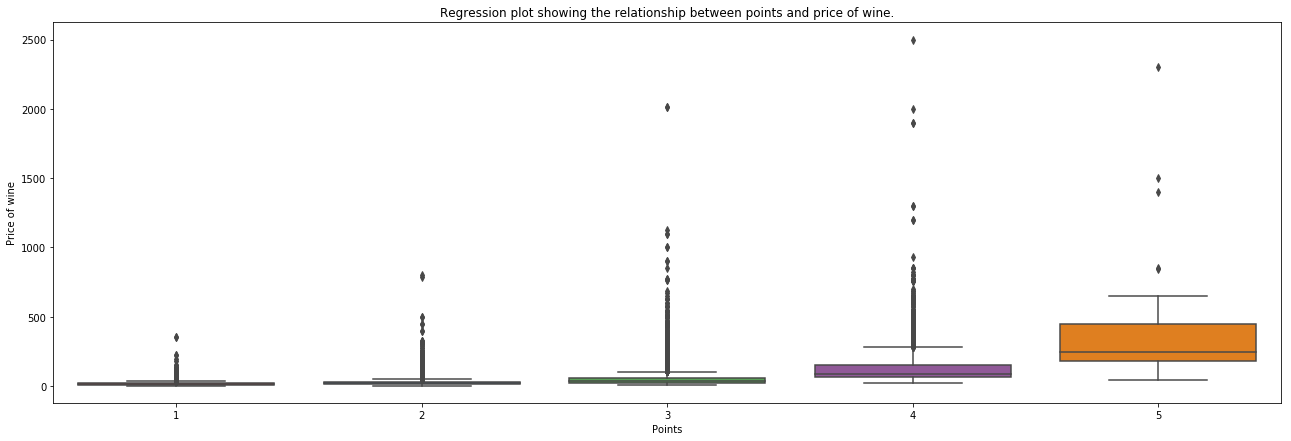

+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+
There exist some study rise in the price of wine as the allocated points by the reviewers increase. This is evident in the plot above and below.
+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+


In [293]:
plt.figure(figsize=(22,7))
sb.boxplot(data=trainwine,x='points_cat',y='price')
plt.xlabel('Points')
plt.ylabel('Price of wine')
plt.title('Regression plot showing the relationship between points and price of wine.')
plt.show()
print('+=+'*48)
print('There exist some study rise in the price of wine as the allocated points by the reviewers increase. This is evident in the plot above and below.')
print('+=+'*48)

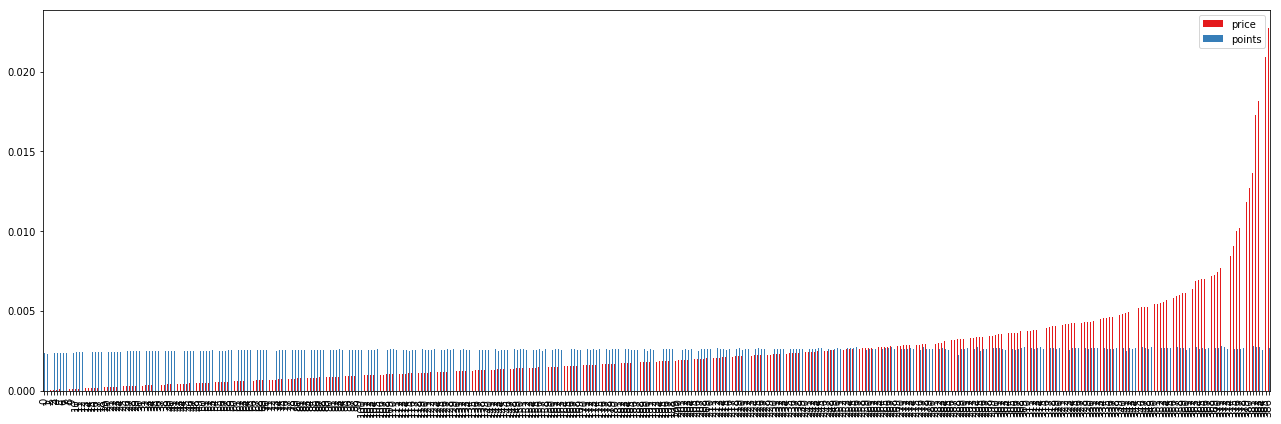

In [294]:
wag = trainwine.groupby('price',as_index=False)['points'].mean()
wag.div(wag.sum(0).astype(float)).plot(kind='bar',stacked=False,figsize=(22,7))


In [0]:
# function to display the dataframe
def show_df(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    # check for NA
    avg_df = avg_df.dropna(axis = 0)
    # display top 10
    df1 = avg_df.head(10)
    # display bottom 10
    df2 = avg_df.tail(10)
    
    html_str=''
    for df in [df1,df2]:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 

In [0]:
def cat_plot(df, cat, col,color1,color2):
    avg = df.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(10, col)
    worst = avg.nsmallest(10, col)
    fig, ax = plt.subplots(1,2,figsize = (18,6))
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", ax= ax[0], color=color1,fontsize = 14, title = "Best " + cat + " by " + col,legend=False)
    worst.plot(kind = "barh", ax=ax[1], color=color2,fontsize = 14, title = "Worst " + cat + " by " + col,legend=False)
    ax[0].title.set_size(16) # Set title size
    ax[1].title.set_size(16)
    plt.tight_layout()
    plt.show()

**Country with the best and worst wine, by points on average.**

According to the reviewers, England has the best wines followed by Austria then Germany. It is surprising to see France rank 7th after Switzerland and even India. It is also shocking not to see US feature in the first 10 countries with the best wines. On the other hand, South Korea and Peru aren't great at wine making compared to other countries. 


In [297]:
show_df(trainwine,'country','points')

,country,points
13,england,91.148148
3,austria,89.219213
16,germany,88.711864
7,canada,88.483766
41,switzerland,88.428571
14,france,88.170762
30,morocco,88.166667
21,italy,88.029759
19,india,88.000000
28,missing,88.000000


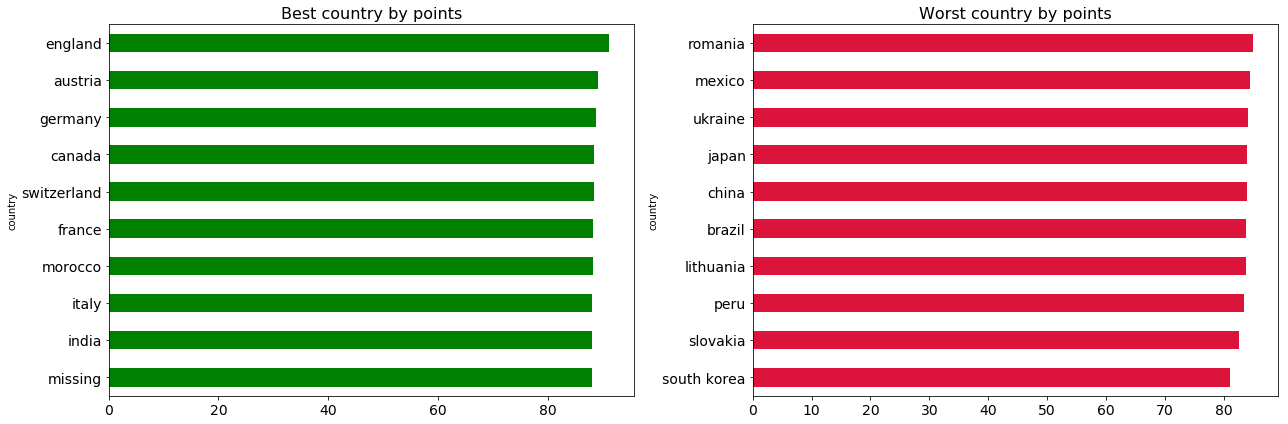

In [298]:
cat_plot(trainwine,'country','points','green','crimson')

**Country with the most expensive and cheapest wine on average.**

Ok, so I thought wines from France and the States were the best- turns out they're just the most expensive! So we can already see, expensive does not equal better, when it comes to wine (and probably most things in life!). Similarly, the cheapeast wine doesn't mean it's necessarily the worst wine (except for Montenegro).

In [299]:
show_df(trainwine,'country','price')

,country,price
41,switzerland,62.714286
13,england,51.574074
18,hungary,43.901961
14,france,43.367316
16,germany,40.280000
21,italy,38.804166
45,us,35.153079
7,canada,35.123377
20,israel,32.243466
2,australia,32.185269


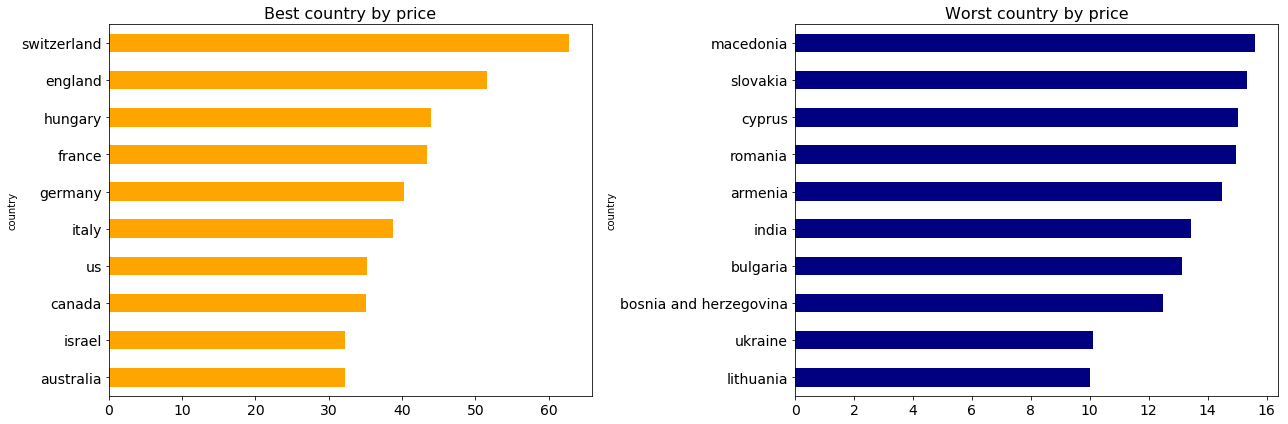

In [300]:
cat_plot(trainwine,'country','price','orange','navy')

**price by variety to know if some varieties are expensive.**

The most expensive winery is château pétrus and it is located in France with an average price of $\$2000.0$. Surprisingly, 8 out of the 10 most expensive wineries are all located France. Only screaming eagle in the US and masseto in Italy could make it into the first 10 most expensive wineries' list. The cheapest winery is broke ass and it is also located in Argentina with an average price of $\$4.0$. 

In [301]:
show_df(trainwine,'winery','price')

,winery,price
4325,château pétrus,2000.000000
5929,domaine du comte liger-belair,1812.500000
3310,château d'yquem,800.000000
4021,château latour,691.166667
1368,blair,610.142857
3766,château haut-brion,598.600000
10755,masseto,587.500000
4034,château laville haut-brion,580.000000
3964,château lafite rothschild,542.500000
13917,screaming eagle,500.000000


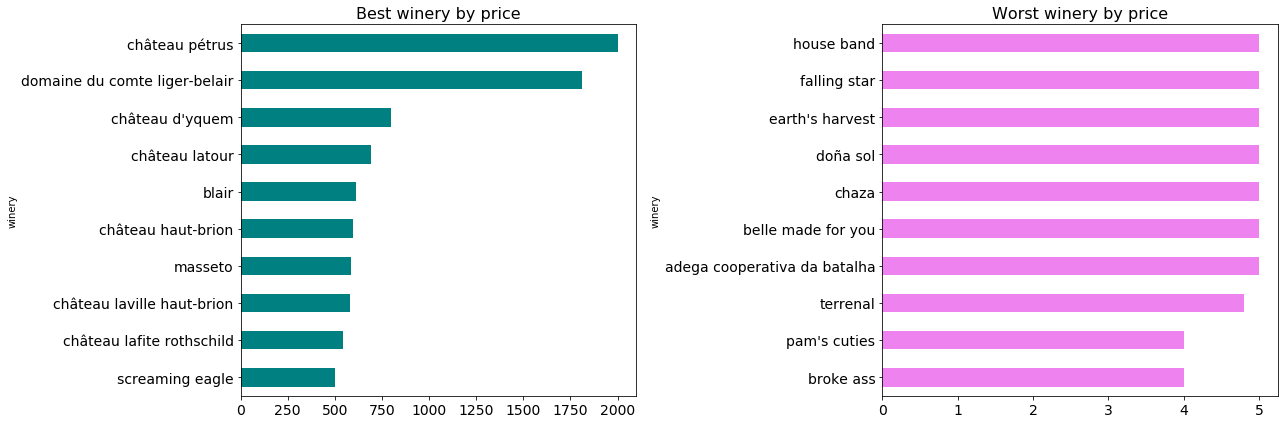

In [302]:
cat_plot(trainwine,'winery','price','teal','violet')

### Feature Engineering

In [0]:
# Description length for the train data
trainwine["desc_len"] = trainwine['description'].apply(len)
trainwine["num_words_desc"] = trainwine['description'].map(lambda x: len(x.split()))

testwine["desc_len"] = testwine['description'].apply(len)
testwine["num_words_desc"] = testwine['description'].map(lambda x: len(x.split()))

It is very obvious from the below plot that the greater the points awarded by the reviewer, the greater the description length.

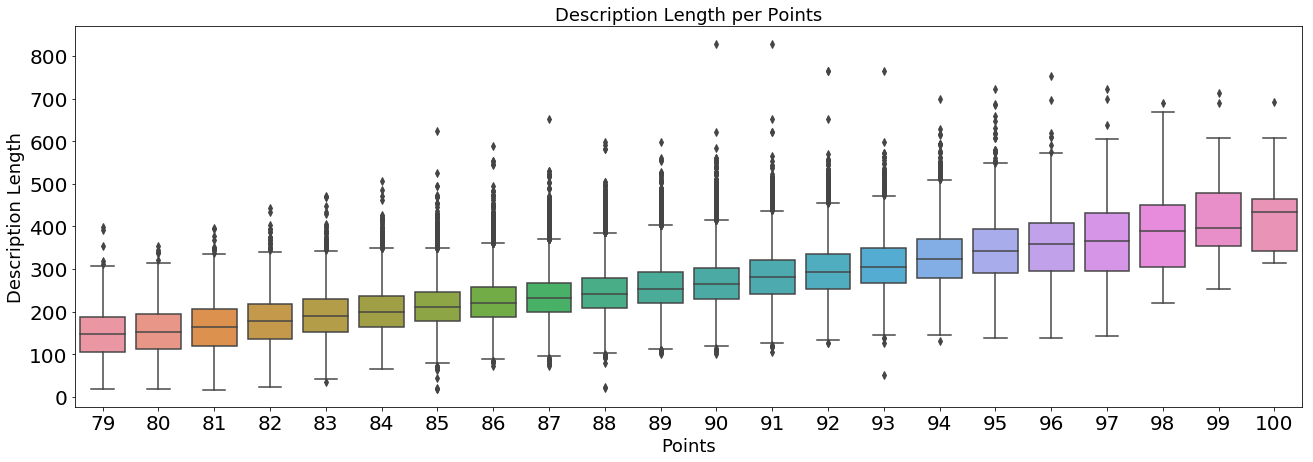

In [304]:
fig, ax = plt.subplots(figsize=(22,7))
sb.boxplot(x='points', y='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', size=18) 
ax.set_ylabel('Description Length', fontsize = 18) # Y label
ax.set_xlabel('Points', fontsize = 18) # X label
plt.show()

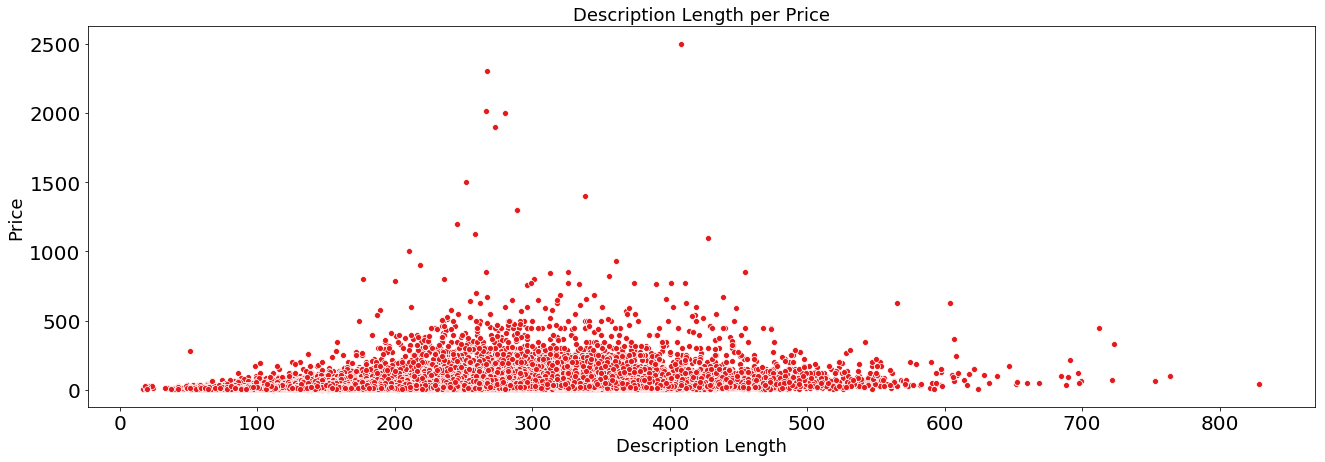

In [305]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='price', x='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Price', size=18) 
ax.set_xlabel('Description Length', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

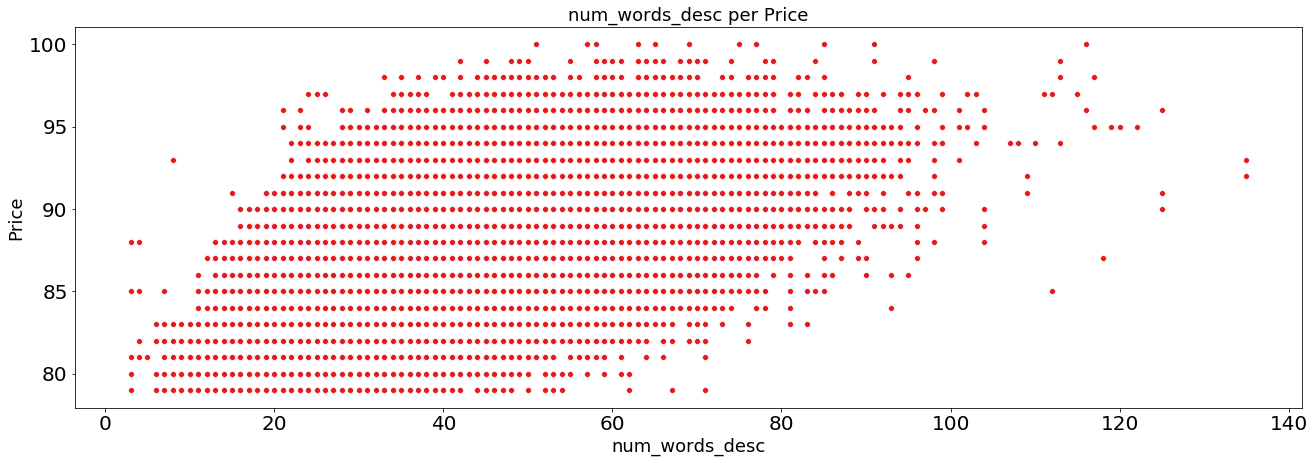

In [306]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='points', x='num_words_desc', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('num_words_desc per Price', size=18) 
ax.set_xlabel('num_words_desc', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

### Model Building

In [307]:
!pip install tensorflow==2.0.0-beta0

In [308]:
!pip install catboost

In [0]:
import os
import math
import keras
import itertools
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV
from lightgbm import LGBMRegressor

**Split data into train and test**

In [310]:
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,missing,portuguese red,j. portugal ramos,2,267,46
71079,france,"a solid, chunky wine, with a structure that is...",missing,88,28.0,bordeaux,lalande de pomerol,bordeaux-style red blend,château tour grand colombier,2,225,41
32440,france,"this is powerful and concentrated, with the hi...",missing,94,130.0,bordeaux,saint-émilion,bordeaux-style red blend,château figeac,3,199,33
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,petite sirah,jaffurs,3,187,31
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,rosé,syncline,3,290,51


In [311]:
testwine.head()

,country,description,designation,points,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,cabernet sauvignon,salvestrin,4,342,57
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,syrah,les vins de vienne,3,227,37
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,cabernet franc,brave & maiden,2,300,55
3,us,white flowers and wild anise give this a crisp...,missing,89,california,sonoma coast,chardonnay,les voleurs,3,196,32
4,us,pinot gris has been making inroads in washingt...,missing,88,washington,columbia valley (wa),pinot gris,chateau ste. michelle,2,201,35


In [312]:
# Split data into train and test
train_size = int(len(trainwine) * .8)

print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(trainwine) - train_size))

Train size: 140000
Test size: 35000


In [313]:
trainwine.dtypes

country            object
description        object
designation        object
points              int64
price             float64
province           object
region_1           object
variety            object
winery             object
points_cat          int64
desc_len            int64
num_words_desc      int64
dtype: object

**Encoding categorical features**

We have to encode the underlisted columns into numeric values:
- ['country', 'designation', 'province','region_1', 'variety', 'winery']

In [0]:
# encoding the categorical features
catfeat = ['country', 'designation', 'province','region_1', 'variety', 'winery']
encoder_dict = {}
for i in catfeat:
  t = trainwine.groupby([i])['price'].mean().sort_values(ascending=True).index
  encoder_dict[i] = {k:i for i,k in enumerate(t,0)}

for i in catfeat:
  trainwine[i] = trainwine[i].map(encoder_dict[i])
  testwine[i] = testwine[i].map(encoder_dict[i])

In [315]:
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
id,,,,,,,,,,,,
32027,28,this is a fine rich balanced wine. it has ripe...,11450,88,20.0,226,713,403,5680,2,267,46
71079,42,"a solid, chunky wine, with a structure that is...",18992,88,28.0,428,901,663,10051,2,225,41
32440,42,"this is powerful and concentrated, with the hi...",18992,94,130.0,428,1190,663,16802,3,199,33
124405,39,"rich, ripe and oaky, this petite sirah charms ...",24176,89,34.0,411,828,519,12947,3,187,31
33649,39,this wine is a unique in the state blend and f...,19017,89,24.0,364,878,214,10261,3,290,51


In [0]:
testwine.fillna(testwine.median(),inplace=True)

In [317]:
trainset = trainwine.sample(frac=.8,random_state=10)
testset = trainwine.drop(index=trainset.index)
print(trainset.shape)
print(testset.shape)

(140000, 12)
(18744, 12)


In [318]:
ytrain = trainset['price']
xtrain = trainset.drop(['price','description','points_cat'],axis=1)
ytest = testset['price']
xtest = testset.drop(['price','description','points_cat'],axis=1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(140000, 9)
(140000,)
(18744, 9)
(18744,)


**Unscaled Models**

In [319]:
# LinearRegression
lin = LinearRegression(n_jobs=-1)
lin = lin.fit(xtrain,ytrain)
linpred = lin.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,linpred))
print('+*+'*20)
print('The RMSE for the linear regression model is {}.'.format(rmse))
print('+*+'*20)
pd.DataFrame({'actual_price':ytest,'predicted_price':linpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the linear regression model is 27.2830957771206.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,24.107759
132328,17.0,20.040232
146382,40.0,32.806153
109813,13.0,16.036301
12842,33.0,38.989084


In [320]:
# RandomForest
rand = RandomForestRegressor(max_features=None,n_estimators=800,max_depth=29,random_state=10,n_jobs=-1)#{10 :md=29: 11.25,ne=800}
rand = rand.fit(xtrain,ytrain)
randpred = rand.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,randpred))
print('+*+'*20)
print('The RMSE for the random forest model is {}.'.format(rmse))
print('+*+'*20)
pd.DataFrame({'actual_price':ytest,'predicted_price':randpred}).head(10)

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the random forest model is 11.259687582403384.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,17.625245
132328,17.0,19.053381
146382,40.0,31.244788
109813,13.0,12.947500
12842,33.0,29.611196
28612,80.0,78.083722
92494,45.0,50.373981
142910,24.0,20.826390
64291,7.0,7.002500


In [0]:
test = testwine.drop(['description','points_cat'],axis=1)
testpred = rand.predict(test)

In [323]:
rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/FinalRandomForestRegressor.csv',index=False)
rand_sub.shape

(83210, 2)

In [0]:
importance = list(rand.feature_importances_)
feat_importance = [(i,round(importance,2)) for i, importance in zip(xtrain.columns,importance)]
feat_importance

[('country', 0.01),
 ('designation', 0.5),
 ('points', 0.04),
 ('province', 0.01),
 ('region_1', 0.08),
 ('variety', 0.02),
 ('winery', 0.31),
 ('desc_len', 0.03),
 ('num_words_desc', 0.02)]

In [0]:
# def Snippet_199(): 
#     print()
#     print(format('How to find optimal parameters for CatBoost using GridSearchCV for Regression','*^82'))    
    
#     model = CatBoostRegressor()
#     parameters = {'depth'         : [3,5,7,9,11,13],
#                   'learning_rate' : [0.01, 0.05, 0.1,0.3,1],
#                   'iterations'    : [300,500,600,700,1000]
#                  }
#     grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
#     grid.fit(xtrain, ytrain)    

#     # Results from Grid Search
#     print("\n========================================================")
#     print(" Results from Grid Search " )
#     print("========================================================")    
    
#     print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
    
#     print("\n The best score across ALL searched params:\n",  grid.best_score_)
    
#     print("\n The best parameters across ALL searched params:\n", grid.best_params_)
    
#     print("\n ========================================================")

# Snippet_199()

In [0]:
# catboost
model = CatBoostRegressor(
        iterations=100, learning_rate=0.1,
        depth=6, l2_leaf_reg=3,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=10)
    
model.fit(xtrain, ytrain,cat_features=catfeat,plot=True,verbose = 20,early_stopping_rounds=10)
y_pred = model.predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest,y_pred))
print('+*+'*24)
print('The RMSE for the cat boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':y_pred}).head()


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 37.5962917	total: 36.9ms	remaining: 3.66s
20:	learn: 29.0691882	total: 547ms	remaining: 2.06s
40:	learn: 27.5132510	total: 1.02s	remaining: 1.47s
60:	learn: 26.9695905	total: 1.49s	remaining: 953ms
80:	learn: 26.4527597	total: 1.98s	remaining: 465ms
99:	learn: 26.1192312	total: 2.43s	remaining: 0us
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the cat boosting regressor model is 27.909985659502215.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
32440,130.0,121.458678
132328,17.0,17.518773
78622,109.0,170.611139
96335,16.0,16.910454
28612,80.0,56.172948


In [0]:
# test = testwine.drop(['description'],axis=1)
# testpred = rand.predict(test)

In [0]:
# rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/Revised_RandomForest_Subm.csv',index=False)
# rand_sub.head()

In [0]:
# Gradient Boosting
grad = GradientBoostingRegressor(random_state=40)#40
grad = grad.fit(xtrain,ytrain)
gradpred = grad.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,gradpred))
print('+*+'*24)
print('The RMSE for the gardient boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':gradpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the gardient boosting regressor model is 16.9577405866256.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
32440,130.0,123.882727
132328,17.0,17.970131
78622,109.0,92.658286
96335,16.0,22.628374
28612,80.0,58.248185


In [0]:
# test = testwine.drop(['description','points_cat'],axis=1)
# testpred = grad.predict(test)

In [0]:
# rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/gradboost_Subm.csv',index=False)
# rand_sub.head()

In [0]:
# Light Gradient Boosting
lgb = LGBMRegressor(learning_rate=0.03,n_estimators=200,max_depth=5,random_state=70,n_jos =-1)
lgb = lgb.fit(xtrain,ytrain)
lgbpred = lgb.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,lgbpred))
print('+*+'*24)
print('The RMSE for the light gardient boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':lgbpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the light gardient boosting regressor model is 18.54609125391036.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
32440,130.0,131.396667
132328,17.0,19.180355
78622,109.0,96.905648
96335,16.0,23.348176
28612,80.0,54.193320


In [0]:
# DecisionTreeRegressor 
dct = DecisionTreeRegressor(random_state=111)
dct = dct.fit(xtrain,ytrain)
dctpred = dct.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,dctpred))
print('+*+'*24)
print('The RMSE for the categorical boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':dctpred}).head(10)

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the categorical boosting regressor model is 21.768368533883883.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
32440,130.0,150.0
132328,17.0,17.0
78622,109.0,95.0
96335,16.0,15.0
28612,80.0,79.0
69440,54.0,50.0
29389,52.0,50.0
75988,25.0,29.0
55767,65.0,65.0


**Neural network**

In [0]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(xtrain.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=64, activation='relu'))
network.add(layers.Dense(units=128, activation='relu'))
network.add(layers.Dense(units=256, activation='relu'))
network.add(layers.Dense(units=512, activation='relu'))
network.add(layers.Dense(units=1024, activation='relu'))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='adam', # Optimization algorithm
                metrics=['mse']) # Mean squared error

# Train neural network
history = network.fit(xtrain, # Features
                      ytrain, # Target vector
                      epochs=50, # Number of epochs
                      verbose=1, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(xtest, ytest)) # Data for evaluation


Train on 99049 samples, validate on 16868 samples
Epoch 1/50
99049/99049 [==============================] - 5s 53us/sample - loss: 144946.2973 - mse: 144946.2969 - val_loss: 960.6325 - val_mse: 960.6324
Epoch 2/50
99049/99049 [==============================] - 5s 49us/sample - loss: 994.9157 - mse: 994.9154 - val_loss: 932.0559 - val_mse: 932.0559
Epoch 3/50
99049/99049 [==============================] - 5s 50us/sample - loss: 979.4522 - mse: 979.4522 - val_loss: 916.9309 - val_mse: 916.9308
Epoch 4/50
99049/99049 [==============================] - 5s 50us/sample - loss: 961.0353 - mse: 961.0351 - val_loss: 896.9932 - val_mse: 896.9932
Epoch 5/50
99049/99049 [==============================] - 5s 50us/sample - loss: 944.6905 - mse: 944.6907 - val_loss: 890.0144 - val_mse: 890.0143
Epoch 6/50
99049/99049 [==============================] - 5s 51us/sample - loss: 930.1615 - mse: 930.1614 - val_loss: 949.3525 - val_mse: 949.3525
Epoch 7/50
99049/99049 [==============================] - 5s 5

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = xtrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(xtrain,ytrain, epochs=500, batch_size=32, validation_data=(xtest, ytest), callbacks=callbacks_list)

Train on 99049 samples, validate on 16868 samples
Epoch 1/500
98656/99049 [============================>.] - ETA: 0s - loss: 1075.9264 - mean_squared_error: 1075.9260
Epoch 00001: val_loss improved from inf to 1000.65971, saving model to Weights-001--1000.65971.hdf5
99049/99049 [==============================] - 9s 94us/sample - loss: 1077.8855 - mean_squared_error: 1077.8851 - val_loss: 1000.6597 - val_mean_squared_error: 1000.6592
Epoch 2/500
98496/99049 [============================>.] - ETA: 0s - loss: 988.4365 - mean_squared_error: 988.4357
Epoch 00002: val_loss improved from 1000.65971 to 865.12619, saving model to Weights-002--865.12619.hdf5
99049/99049 [==============================] - 10s 100us/sample - loss: 985.0576 - mean_squared_error: 985.0568 - val_loss: 865.1262 - val_mean_squared_error: 865.1262
Epoch 3/500
98752/99049 [============================>.] - ETA: 0s - loss: 949.3483 - mean_squared_error: 949.3480
Epoch 00003: val_loss did not improve from 865.12619
99049/9

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [0]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':TW['id'],'price':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

In [0]:
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'submission(NN).csv')

**NN 2**

In [0]:
cat_counts = {'country':48, 'winery': 18158, 'variety':745, 'province':483, 'region_1':1308, 'region_2':19,
'designation':44390 }
description_input = keras.Input(shape=(None,), name='description')
country_input = keras.Input(shape=(1,), name='country')
province_input = keras.Input(shape=(1,), name='province')
winery_input = keras.Input(shape=(1,), name='winery')
variety_input = keras.Input(shape=(1,), name='variety')
points_input = keras.Input(shape=(1,), name='points')
region_1_input = keras.Input(shape=(1,), name='region_1')
region_2_input = keras.Input(shape=(1,), name='region_2')
designation_input = keras.Input(shape=(1,), name='designation')
#Embed Sparse Input
country_features = keras.layers.Embedding(cat_counts['country'], 3)(country_input)
country_features = keras.layers.Reshape(target_shape=(3,))(country_features)
province_features = keras.layers.Embedding(cat_counts['province'], 5)(province_input)
province_features = keras.layers.Reshape(target_shape=(5,))(province_features)
winery_features = keras.layers.Embedding(cat_counts['winery'], 12)(winery_input)
winery_features = keras.layers.Reshape(target_shape=(12,))(winery_features)
variety_features = keras.layers.Embedding(cat_counts['variety'], 6)(variety_input)
variety_features = keras.layers.Reshape(target_shape=(6,))(variety_features)
region_1_features = keras.layers.Embedding(cat_counts['region_1'], 6)(region_1_input)
region_1_features = keras.layers.Reshape(target_shape=(6,))(region_1_features)
region_2_features = keras.layers.Embedding(cat_counts['region_2'], 3)(region_2_input)
region_2_features = keras.layers.Reshape(target_shape=(3,))(region_2_features)
designation_features = keras.layers.Embedding(cat_counts['designation'], 16)(designation_input)
designation_features = keras.layers.Reshape(target_shape=(16,))(designation_features)

description_features = keras.layers.Embedding(vocab_size+1, 64)(description_input)
#points_features = keras.layers.Reshape(target_shape=(1, 1))(points_input)
#Reduce Sequence of embedded words in description to a 128 dimensional vector
description_features = keras.layers.LSTM(128)(description_features)
#description_features = keras.layers.Reshape(target_shape=(128))(description_features)

#Merge all features together
x = keras.layers.concatenate([country_features, province_features, winery_features, variety_features,
description_features, region_1_features, region_2_features, designation_features, points_input])
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
output = keras.layers.Dense(1, activation='linear', name='price')(x)

def create_model():
  model = keras.Model(inputs=[country_input, province_input, winery_input, variety_input,
  description_input, region_1_input, region_2_input, designation_input, points_input], outputs=output)

  return model

**Tokenizing description for inclusion in model**

In [0]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding

import tensorflow as tf

In [9]:
fg = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/Cleaned_Data.csv')
fg.head()

,country,description,designation,points,price,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
0,29,this is a fine rich balanced wine. it has ripe...,11506,88,20.0,216,724,406,5886,2,267,46
1,43,"a solid, chunky wine, with a structure that is...",18999,88,28.0,426,897,662,10030,2,225,41
2,43,"this is powerful and concentrated, with the hi...",18999,94,130.0,426,1193,662,16822,3,199,33
3,39,"rich, ripe and oaky, this petite sirah charms ...",24356,89,34.0,414,832,518,12978,3,187,31
4,39,this wine is a unique in the state blend and f...,19152,89,24.0,363,889,208,10228,3,290,51


In [40]:
fg['price'].shape

(123811,)

In [10]:
ff = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/test_clean.csv')
ff.head()

,country,description,designation,points,province,region_1,variety,winery,points_cat,desc_len,num_words_desc
0,39.0,"sweet new oak stands out, giving this cabernet...",34724.0,95,414.0,1194.0,653.0,15011.0,4,342,57
1,43.0,charming raspberry aromas intertwine with scen...,18999.0,90,434.0,160.0,598.0,14835.0,3,227,37
2,39.0,"ripe blackberry, leather and soy show on the n...",22144.0,88,414.0,912.0,555.0,15953.0,2,300,55
3,39.0,white flowers and wild anise give this a crisp...,18999.0,89,414.0,1103.0,553.0,12828.0,3,196,32
4,39.0,pinot gris has been making inroads in washingt...,18999.0,88,363.0,772.0,361.0,7683.0,2,201,35


In [0]:
from nltk.tokenize import word_tokenize
vocab_size = 20000
word_count = lambda sentence: len(word_tokenize(sentence))
dic = {}
DICT = {}
for i in  fg[['description']].columns:
    column_name = i
    longest_sentence = max(fg[str(i)], key=word_count)
    length_long_sentence = len(word_tokenize(longest_sentence))
    column_train = [one_hot(sent, vocab_size) for sent in fg[str(i)]]
    column_test = [one_hot(sent, vocab_size) for sent in ff[str(i)]]
    dic[str(column_name)] = pad_sequences(column_train, length_long_sentence, padding='post')
    DICT[str(column_name)] = pad_sequences(column_test, length_long_sentence, padding='post')

In [36]:
TRAIN = np.concatenate((dic['description'],fg[['country', 'description', 'designation', 'points', 'province','region_1', 'variety', 'winery', 'points_cat', 'desc_len',
       'num_words_desc','price']].to_numpy()), axis=1)

TEST = np.concatenate((DICT['description'], ff[['country', 'description', 'designation', 'points', 'province','region_1', 'variety', 'winery', 'points_cat', 'desc_len',
       'num_words_desc']].to_numpy()), axis=1)
print(TRAIN.shape)
print(TEST.shape)

(123811, 168)
(83210, 167)


In [37]:
ANN_model = Sequential()
ANN_model.add(layers.Embedding(input_dim=123811, output_dim=18, input_length=TRAIN.shape[1]))
ANN_model.add(layers.Flatten())
ANN_model.add(layers.Dense(13, activation='relu'))
ANN_model.add(layers.Dense(8, activation='relu'))
ANN_model.add(layers.Dense(1, activation='linear'))
ANN_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
ANN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 168, 18)           2228598   
_________________________________________________________________
flatten_6 (Flatten)          (None, 3024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 13)                39325     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 2,268,044
Trainable params: 2,268,044
Non-trainable params: 0
_________________________________________________________________


In [38]:
ANN_model.fit(TRAIN,target, epochs=10, batch_size = 16, validation_split=0.2, callbacks=callbacks_list, shuffle=True)

IndexError: ignored

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
ANN_model.load_weights(wights_file) # load it
ANN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [0]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':TW['id'],'price':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

In [0]:
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'submission(NN).csv')

In [0]:
# Create a tokenizer to preprocess our text descriptions
vocab_size = 12000 # This is a hyperparameter, experiment with different values for your dataset
tokenize = keras.preprocessing.text.Tokenizer(num_words=vocab_size, char_level=False)
tokenize.fit_on_texts(description_train) # only fit on train

In [0]:
# Wide feature 1: sparse bag of words (bow) vocab_size vector 
description_bow_train = tokenize.texts_to_matrix(description_train)
description_bow_test = tokenize.texts_to_matrix(description_test)

In [0]:
# Wide feature 2: one-hot vector of variety categories

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(variety_train)
variety_train = encoder.transform(variety_train)
variety_test = encoder.transform(variety_test)
num_classes = np.max(variety_train) + 1

# Convert labels to one hot
variety_train = keras.utils.to_categorical(variety_train, num_classes)
variety_test = keras.utils.to_categorical(variety_test, num_classes)

(99048, 12)

In [0]:
# Define our wide model with the functional API
bow_inputs = layers.Input(shape=(vocab_size,))
variety_inputs = layers.Input(shape=(num_classes,))
merged_layer = layers.concatenate([bow_inputs, variety_inputs])
merged_layer = layers.Dense(256, activation='relu')(merged_layer)
predictions = layers.Dense(1)(merged_layer)
wide_model = keras.Model(inputs=[bow_inputs, variety_inputs], outputs=predictions)

In [0]:
wide_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(wide_model.summary())

In [0]:
# Deep model feature: word embeddings of wine descriptions
train_embed = tokenize.texts_to_sequences(description_train)
test_embed = tokenize.texts_to_sequences(description_test)

max_seq_length = 170
train_embed = keras.preprocessing.sequence.pad_sequences(
    train_embed, maxlen=max_seq_length, padding="post")
test_embed = keras.preprocessing.sequence.pad_sequences(
    test_embed, maxlen=max_seq_length, padding="post")

,country,designation,province,region_1,variety,winery
id,,,,,,
32027,29,11506,216,724,406,5886
71079,43,18999,426,897,662,10030
32440,43,18999,426,1193,662,16822
124405,39,24356,414,832,518,12978
33649,39,19152,363,889,208,10228


In [0]:
# Define our deep model with the Functional API
deep_inputs = layers.Input(shape=(max_seq_length,))
embedding = layers.Embedding(vocab_size, 8, input_length=max_seq_length)(deep_inputs)
embedding = layers.Flatten()(embedding)
embed_out = layers.Dense(1)(embedding)
deep_model = keras.Model(inputs=deep_inputs, outputs=embed_out)
print(deep_model.summary())

,country,description,points,province,winery,desc_len,num_words_desc
id,,,,,,,
32027,32,this is a fine rich balanced wine. it has ripe...,88,8,8159,267,46
71079,14,"a solid, chunky wine, with a structure that is...",88,38,4139,225,41
32440,14,"this is powerful and concentrated, with the hi...",94,38,3374,199,33
124405,44,"rich, ripe and oaky, this petite sirah charms ...",89,53,8205,187,31
33649,44,this wine is a unique in the state blend and f...,89,436,13730,290,51


In [0]:
deep_model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['accuracy'])

In [0]:
# Combine wide and deep into one model
merged_out = layers.concatenate([wide_model.output, deep_model.output])
merged_out = layers.Dense(1)(merged_out)
combined_model = keras.Model(wide_model.input + [deep_model.input], merged_out)
print(combined_model.summary())

combined_model.compile(loss='mse',
                       optimizer='adam',
                       metrics=['accuracy'])

In [0]:
# Run training
combined_model.fit([description_bow_train, variety_train] + [train_embed], labels_train, epochs=10, batch_size=128)

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the linear regression model is 30.7810942247438.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
32440,130.0,66.625378
132328,17.0,20.122240
78622,109.0,86.275525
96335,16.0,24.596307
28612,80.0,49.461831


In [0]:
combined_model.evaluate([description_bow_test, variety_test] + [test_embed], labels_test, batch_size=128)

In [0]:
# Generate predictions
predictions = combined_model.predict([description_bow_test, variety_test] + [test_embed])